In [5]:
import pickle
import sys
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')
from execute_remote_scripts import *
from Processing_Data.downsampling import *
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2
from Server_Scripts.remote_processing_csv import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
file = load_pickle(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\20_random_JET_data.pkl')
shot = file['JETno85000']

In [131]:
SSX = shot['SSXcore']
t_b = shot['Ramp_up'][0]
t_e = shot['Ramp_down'][1]
print(t_b, t_e)

40.917400001490115 59.467300001490116


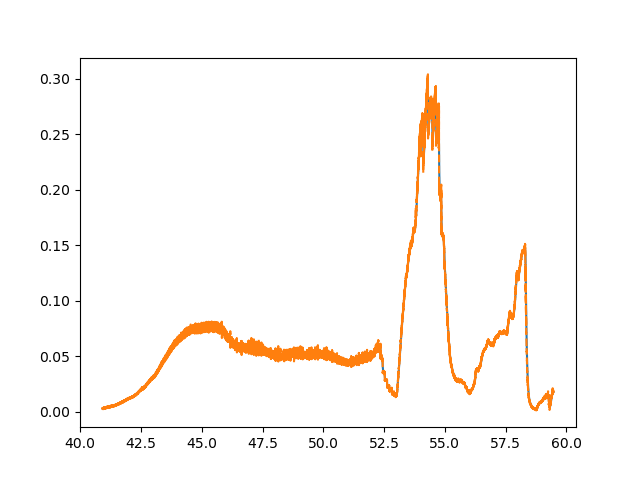

In [132]:
plt.close()
downsampled_time, downsampled_signal = downsample_timeseries(t_b, t_e, SSX['time'], SSX['signal'], 1000)
plt.plot(downsampled_time, downsampled_signal)
plt.plot(SSX['time'][(SSX['time'] >= t_b) & (SSX['time'] <= t_e)], SSX['signal'][(SSX['time'] >= t_b) & (SSX['time'] <= t_e)], '--')
plt.show()

In [4]:
merged_df = downsample_and_merge(shot)

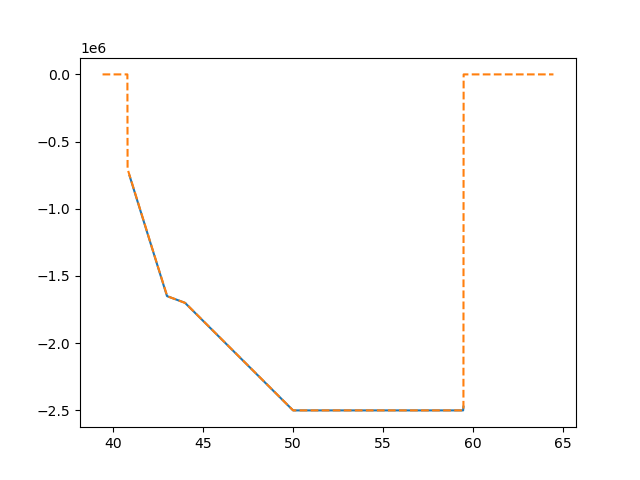

In [8]:
plt.close()
plt.plot(merged_df['time'], merged_df['IP'])
plt.plot(shot['IP']['time'], shot['IP']['signal'], '--')

In [21]:
def plot(timeseries):
    plt.plot(timeseries['time'], timeseries['signal'])

processed_h5_file = process_h5_file(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\JETno83648.h5')
merged_h5 = downsample_and_merge(processed_h5_file)

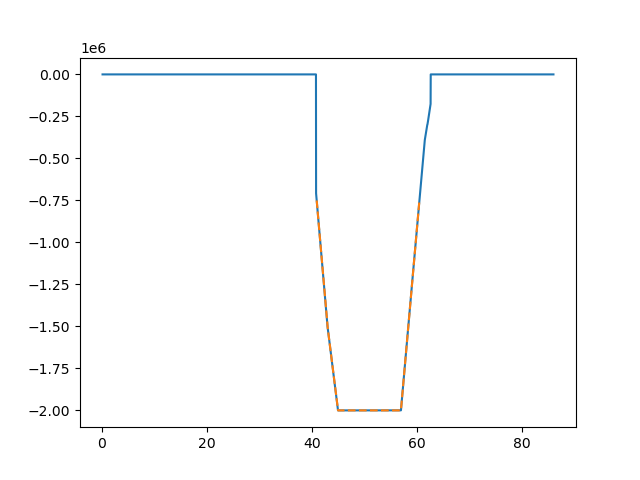

In [42]:
plt.close()
plot(processed_h5_file['IP'])
plt.plot(merged_h5['time'], merged_h5['IP'], '--')